In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data['Cabin'] = np.where(data.Cabin.isnull(), 1, 0)

In [7]:
data.Cabin

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin, Length: 891, dtype: int32

In [8]:
data.groupby('Survived')['Cabin'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

In [9]:
def mean_imputation(data, feature, mean):
    data[feature+'_mean'] = data[feature].fillna(mean)
    return data

In [10]:
mean = data.Age.mean()
mean

29.69911764705882

In [11]:
mean_imputation(data, 'Age', mean)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,C,26.000000


In [12]:
def median_imputation(data, feature, median):
    data[feature+'_median'] = data[feature].fillna(median)
    return data

In [13]:
median = data.Age.median()
median

28.0

In [14]:
median_imputation(data, 'Age', median)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,22.000000,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,38.000000,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,26.000000,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,35.000000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S,27.000000,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,19.000000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1,S,29.699118,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,C,26.000000,26.0


In [15]:
median = data.Cabin.median()

In [16]:
median_imputation(data, 'Cabin', median)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Cabin_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,22.000000,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,38.000000,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,26.000000,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,35.000000,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,35.000000,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S,27.000000,27.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,19.000000,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1,S,29.699118,28.0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,C,26.000000,26.0,0


In [17]:
data.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

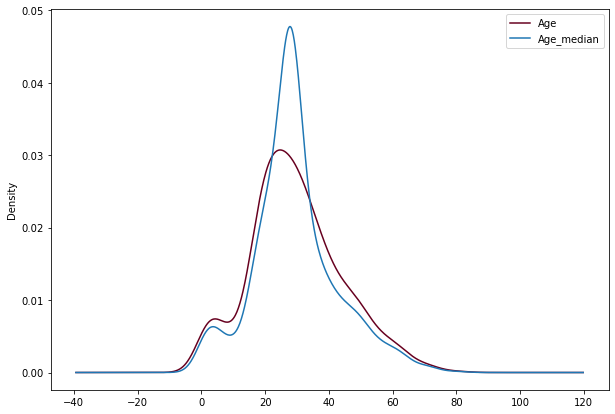

In [18]:
figure = plt.figure(figsize=(10,7))
ax = figure.add_subplot(111)
data.Age.plot(kind='kde', ax=ax, colormap='RdBu')
data.Age_median.plot(kind='kde', ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

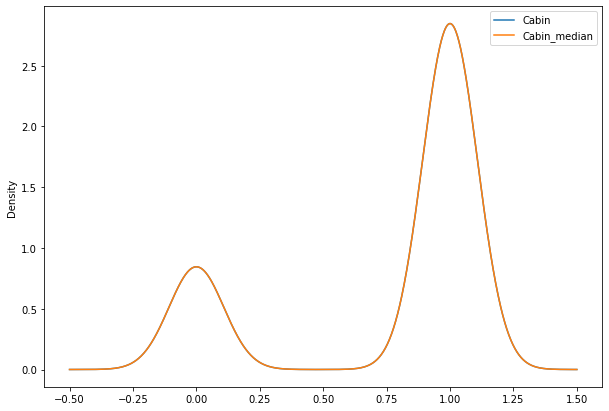

In [19]:
figure = plt.figure(figsize=(10,7))
ax = figure.add_subplot(111)
data.Cabin.plot(kind='kde', ax = ax)
data.Cabin_median.plot(kind='kde', ax = ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

In [20]:
def mode_imputation(data, feature, mode):
    data[feature+'_mode'] = data[feature].fillna(mode)
    return data

In [21]:
mode = data.Age.mode()
mode

0    24.0
Name: Age, dtype: float64

In [22]:
mode_imputation(data, 'Age', mode)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Cabin_median,Age_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,22.000000,22.0,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,38.000000,38.0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,26.000000,26.0,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,35.000000,35.0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,35.000000,35.0,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S,27.000000,27.0,1,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,19.000000,19.0,0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1,S,29.699118,28.0,1,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,C,26.000000,26.0,0,26.0


In [23]:
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']

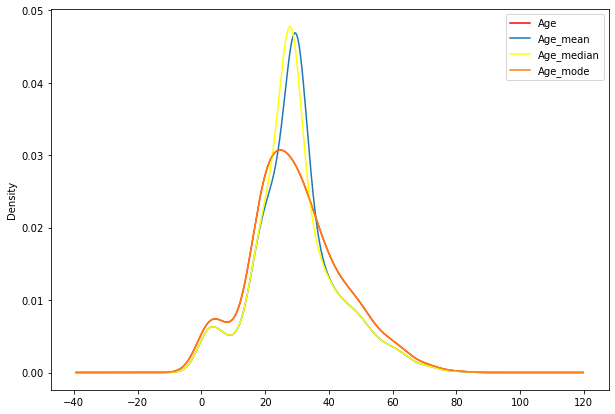

In [24]:
figure= plt.figure(figsize=(10,7))
ax = figure.add_subplot(111)
data.Age.plot(kind='kde', ax = ax, color='red')
data.Age_mean.plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='yellow')
data.Age_mode.plot(kind='kde', ax=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

<AxesSubplot:ylabel='Density'>

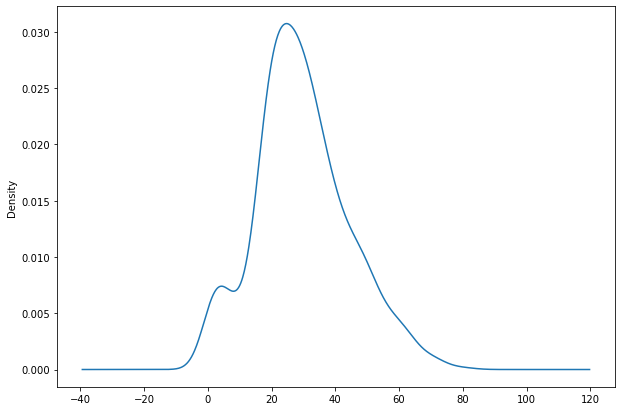

In [25]:
plt.figure(figsize=(10,7))
data.Age.plot(kind='kde')

In [26]:
def standard_deviation(data, feature):
    return data[feature].std()

In [27]:
standard_deviation(data, 'Age')

14.526497332334044

In [28]:
standard_deviation(data, 'Age_median')

13.019696550973194

In [29]:
standard_deviation(data, 'Age_mean')

13.002015226002884

In [30]:
standard_deviation(data, 'Age_mode')

14.526497332334044